initial vx, vy: 0.9396926207859084 0.3420201433256687
Bounce at: 1.0 0.29117618741296186
Rotating vector
Rotating counter-clockwise
new vx, vy: -0.3420201433256687 0.9396926207859084
Bounce at: 0.742009230879233 1.0
Rotating vector
Rotating counter-clockwise
new vx, vy: -0.9396926207859084 -0.3420201433256687
Bounce at: 0.0 0.729930726409201
Rotating vector
Rotating counter-clockwise
new vx, vy: 0.3420201433256687 -0.9396926207859084
Bounce at: 0.2656730574892561 0.0
Rotating vector
Rotating counter-clockwise
new vx, vy: 0.9396926207859084 0.3420201433256687
Bounce at: 1.0 0.26727314929361956
Rotating vector
Rotating counter-clockwise
new vx, vy: -0.3420201433256687 0.9396926207859084
Bounce at: 0.733309236495262 1.0
Rotating vector
Rotating counter-clockwise
new vx, vy: -0.9396926207859084 -0.3420201433256687
Bounce at: 0.0 0.7330972654032495
Rotating vector
Rotating counter-clockwise
new vx, vy: 0.3420201433256687 -0.9396926207859084
Bounce at: 0.266825583428733 0.0
Rotating vector
R

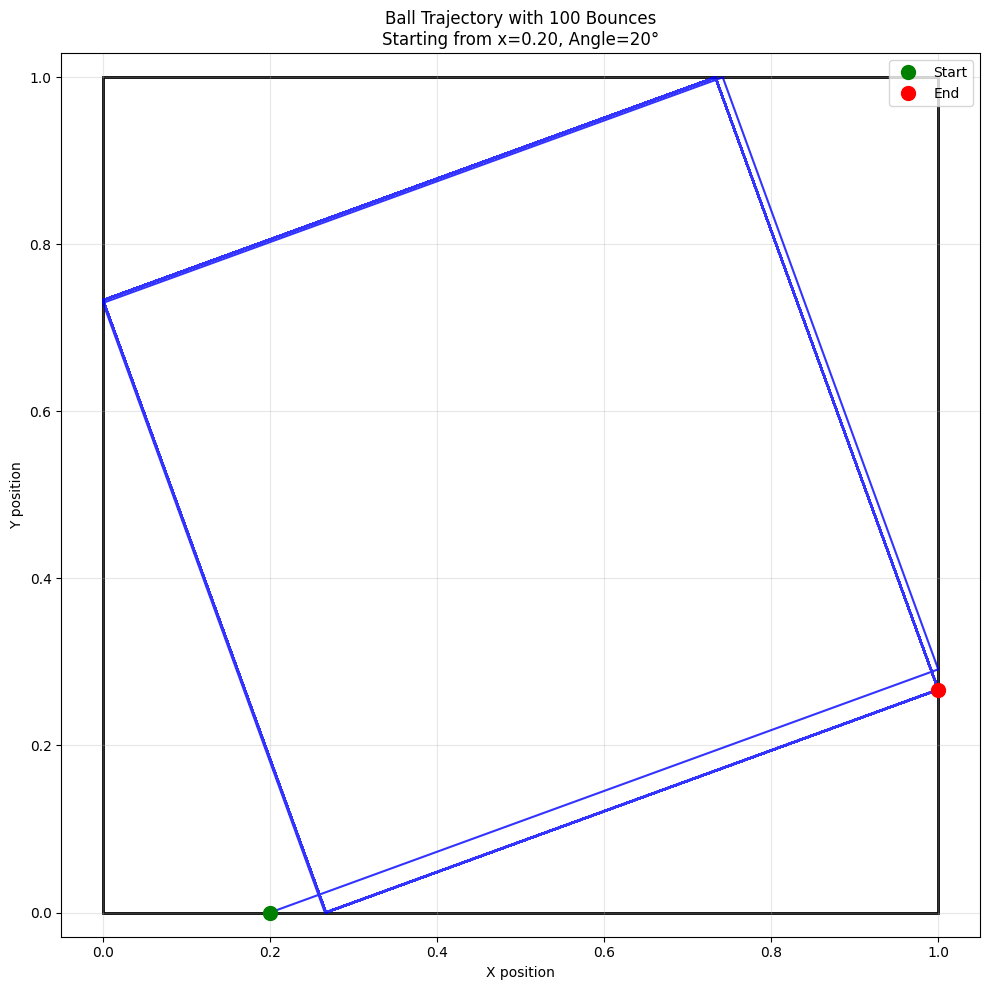

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

def rotate_vector(vx, vy, clockwise=True):
    print("Rotating vector")
    if clockwise:
        print("Rotating clockwise")
    else:
        print("Rotating counter-clockwise")
    velocity = np.array([vx, vy])
    rotation_matrix = np.array([[0, 1], [-1, 0]]) if clockwise else np.array([[0, -1], [1, 0]])
    rotated_velocity = rotation_matrix @ velocity
    return rotated_velocity[0], rotated_velocity[1]

table_size = 1.0
plt.figure(figsize=(10, 10))
plt.gca().add_patch(Rectangle((0, 0), table_size, table_size, fill=False, linewidth=2))

x, y = 0.2 * table_size, 0.0
angle_degrees = 20
vx, vy = np.cos(np.radians(angle_degrees)), np.sin(np.radians(angle_degrees))
bounce_times = 100

print("initial vx, vy:", vx, vy)

x_positions = [x]
y_positions = [y]
bounce_points = []

for bounce in range(bounce_times + 1):
    time_to_right = (table_size - x) / vx if vx > 0 else float('inf')
    time_to_left = -x / vx if vx < 0 else float('inf')
    time_to_top = (table_size - y) / vy if vy > 0 else float('inf')
    time_to_bottom = -y / vy if vy < 0 else float('inf')

    time_to_collision = min(time_to_right, time_to_left, time_to_top, time_to_bottom)

    x += vx * time_to_collision
    y += vy * time_to_collision

    if time_to_collision == time_to_right:
        x = 1.0
    elif time_to_collision == time_to_left:
        x = 0.0
    elif time_to_collision == time_to_top:
        y = 1.0
    elif time_to_collision == time_to_bottom:
        y = 0.0

    bounce_points.append((x, y))
    x_positions.append(x)
    y_positions.append(y)
    print("Bounce at:", x, y)

    if x == 0.0:
        if vy < 0.0:
            vx, vy = rotate_vector(vx, vy, clockwise=False)
        elif vy > 0.0:
            vx, vy = rotate_vector(vx, vy)
    elif x == table_size:
        if vy < 0.0:
            vx, vy = rotate_vector(vx, vy)
        elif vy > 0.0:
            vx, vy = rotate_vector(vx, vy, clockwise=False)
    if y == 0.0:
        if vx < 0.0:
            vx, vy = rotate_vector(vx, vy)
        elif vx > 0.0:
            vx, vy = rotate_vector(vx, vy, clockwise=False)
    elif y == table_size:
        if vx < 0.0:
            vx, vy = rotate_vector(vx, vy, clockwise=False)
        elif vx > 0.0:
            vx, vy = rotate_vector(vx, vy)

    print("new vx, vy:", vx, vy)

plt.plot(x_positions, y_positions, '-', linewidth=1.5, alpha=0.8, color='blue')
plt.plot(x_positions[0], y_positions[0], 'go', markersize=10, label='Start')
plt.plot(x_positions[-1], y_positions[-1], 'ro', markersize=10, label='End')

plt.grid(True, alpha=0.3)
plt.title(f'Ball Trajectory with {bounce_times} Bounces\nStarting from x={x_positions[0]:.2f}, Angle={angle_degrees}°')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

